In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn import metrics as mt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
import re

In [2]:
ds=pd.read_csv(r'H:\IDMA\Module 3\Machine Learning Case Study\Dataset (6).csv',parse_dates=['Travel Date'])
ds

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2021-08-27,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,2021-12-12,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,ae3ae6ca299180d470145a0e154cbf2b,Shimla & Manali Retreat from Delhi,Deluxe,Shimla|Manali|New Delhi,2N Shimla . 3N Manali . 1N New Delhi,Shimla|Manali|New Delhi,2021-04-15,Summit Thistle Villa Resort & Spa:Four|Snow Va...,Mumbai,Not Available,1,3,Mall road | Indira Bunglow | Himalayan Zoo | ...,Cancellation any time after making the 1st pay...,16168.5
20996,6ccc538e3597a909f609fcb2eba9be5e,Bedazzling Kashmir Holiday,Luxury,Srinagar|Gulmarg|Pahalgam|Srinagar,1N Srinagar . 1N Gulmarg . 2N Pahalgam . 3N Sr...,Srinagar|Gulmarg|Pahalgam|Srinagar,2021-08-30,The Orchard Retreat & Spa:4.6|The Khyber Himal...,New Delhi,Vistara|Vistara,0,4,Dal Lake | Gondola Point | Avantipura Ruins |...,Cancellation any time after making the 1st pay...,33770.5
20997,d3b412fa94ce5503204024c6db2f60b7,A relaxing week in Colombo (Bentota and Galle ...,Deluxe,Colombo,5N Colombo,Colombo,2021-02-27,Mount Lavinia Hotel-MMT HOLIDAYS SPECIAL:4.0,New Delhi,IndiGo|IndiGo|IndiGo|IndiGo,1,3,Sigiriya Excursion | Nuwara Eliya Excursion,Cancellation any time after making the 1st pay...,29964.0
20998,51d843fb852ec7abde8299fe31111bd5,Awesome North East with Pelling,Deluxe,Darjeeling|Pelling|Gangtok,2N Darjeeling . 2N Pelling . 2N Gangtok,Darjeeling|Pelling|Gangtok,2022-01-13,Ramada by Wyndham Darjeeling Gandhi Road:4.4|T...,New Delhi,IndiGo,1,3,Tiger Hill | Himalayan Mountaineering Institu...,Cancellation any time after making the 1st pay...,28145.5


In [3]:
ds.drop(['Uniq Id','Destination'],axis=1,inplace=True)

In [4]:
ds.shape

(21000, 13)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Package Name                21000 non-null  object        
 1   Package Type                21000 non-null  object        
 2   Itinerary                   21000 non-null  object        
 3   Places Covered              21000 non-null  object        
 4   Travel Date                 21000 non-null  datetime64[ns]
 5   Hotel Details               21000 non-null  object        
 6   Start City                  21000 non-null  object        
 7   Airline                     21000 non-null  object        
 8   Flight Stops                21000 non-null  int64         
 9   Meals                       21000 non-null  int64         
 10  Sightseeing Places Covered  21000 non-null  object        
 11  Cancellation Rules          21000 non-null  object    

In [6]:
ds.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.90,0.99])

,Flight Stops,Meals,Per Person Price
count,21000.000000,21000.000000,21000.000000
mean,0.870286,3.665429,20059.330381
std,0.834989,0.893631,11643.641766
min,0.000000,2.000000,791.000000
1%,0.000000,2.000000,4239.480000
5%,0.000000,3.000000,6882.875000
25%,0.000000,3.000000,12461.000000
50%,1.000000,3.000000,17765.500000
75%,2.000000,5.000000,25081.375000
90%,2.000000,5.000000,33059.000000


In [7]:
ds.isnull().sum()

Package Name                  0
Package Type                  0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
Per Person Price              0
dtype: int64

In [8]:
ds.drop_duplicates(inplace=True)

In [9]:
ds.shape

(20997, 13)

In [10]:
for i in ds.columns:
    print(i,'-------',ds[i].nunique())

Package Name ------- 2204
Package Type ------- 5
Itinerary ------- 966
Places Covered ------- 565
Travel Date ------- 495
Hotel Details ------- 6060
Start City ------- 2
Airline ------- 314
Flight Stops ------- 3
Meals ------- 4
Sightseeing Places Covered ------- 1714
Cancellation Rules ------- 10
Per Person Price ------- 17138


In [11]:
a=[]
for i in ds['Places Covered']:
    summ=0
    b=re.split(r' and|[;|\|]',i)
    
    a.append(len(b))
ds['No.of Places Covered'] = a

In [12]:
ds['Travel Month'] = ds['Travel Date'].dt.month

In [13]:
ds['Travel Year'] = ds['Travel Date'].dt.year

In [14]:
b=[]
for i in ds['Sightseeing Places Covered']:
    c=str(i)
    d=c.split('|')
    b.append(len(d))
ds['No.of seightseeing Places']=b

In [15]:
c=[]
z="[0-9]+"
for i in ds['Itinerary']:
    ww=re.findall(z,i)
    qq=sum([int(j) for j in ww])
    c.append(qq)
ds['No.of days spent']=c

In [16]:
p=[]
for i in ds['Airline']:
    d=str(i)
    e=d.split('|')
    p.append(len(e))
ds['No of Airlines Used']=p

In [17]:
ds['Per Person Price'].describe(percentiles=[0.01,0.05,0.25,0.50,0.90,0.95,0.99])

count     20997.000000
mean      20060.869291
std       11643.749767
min         791.000000
1%         4239.420000
5%         6882.500000
25%       12464.500000
50%       17766.000000
90%       33059.000000
95%       39631.300000
99%       60046.620000
max      171062.500000
Name: Per Person Price, dtype: float64

In [18]:
conditions = [ds['Per Person Price']<4200,(ds['Per Person Price']>=4200)&(ds['Per Person Price']<=60100),ds['Per Person Price']>60100]
labels = [4200,ds['Per Person Price'],60100]
ds['New Price'] = np.select(conditions,labels)

In [19]:
ds['New Price'].describe(percentiles=[0.01,0.05,0.25,0.50,0.90,0.95,0.99])

count    20997.000000
mean     19869.350741
std      10508.436599
min       4200.000000
1%        4239.420000
5%        6882.500000
25%      12464.500000
50%      17766.000000
90%      33059.000000
95%      39631.300000
99%      60046.620000
max      60100.000000
Name: New Price, dtype: float64

In [20]:
ds

,Package Name,Package Type,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,No.of Places Covered,Travel Month,Travel Year,No.of seightseeing Places,No.of days spent,No of Airlines Used,New Price
0,Best of Shimla and Manali Holiday from Delhi,Standard,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,7,2021,1,6,1,11509.0
1,Kashmir Valley vacation,Premium,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,8,2021,7,4,2,22485.5
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,2,4,2021,8,3,1,12421.5
3,Colorful Kerala ( Romantic Getaway ),Premium,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2021-08-27,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,5,8,2021,9,6,1,35967.0
4,A Week In Bangkok & Pattaya,Premium,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,2021-12-12,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,2,12,2021,2,7,2,25584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,Shimla & Manali Retreat from Delhi,Deluxe,2N Shimla . 3N Manali . 1N New Delhi,Shimla|Manali|New Delhi,2021-04-15,Summit Thistle Villa Resort & Spa:Four|Snow Va...,Mumbai,Not Available,1,3,Mall road | Indira Bunglow | Himalayan Zoo | ...,Cancellation any time after making the 1st pay...,16168.5,3,4,2021,12,6,1,16168.5
20996,Bedazzling Kashmir Holiday,Luxury,1N Srinagar . 1N Gulmarg . 2N Pahalgam . 3N Sr...,Srinagar|Gulmarg|Pahalgam|Srinagar,2021-08-30,The Orchard Retreat & Spa:4.6|The Khyber Himal...,New Delhi,Vistara|Vistara,0,4,Dal Lake | Gondola Point | Avantipura Ruins |...,Cancellation any time after making the 1st pay...,33770.5,4,8,2021,9,7,2,33770.5
20997,A relaxing week in Colombo (Bentota and Galle ...,Deluxe,5N Colombo,Colombo,2021-02-27,Mount Lavinia Hotel-MMT HOLIDAYS SPECIAL:4.0,New Delhi,IndiGo|IndiGo|IndiGo|IndiGo,1,3,Sigiriya Excursion | Nuwara Eliya Excursion,Cancellation any time after making the 1st pay...,29964.0,1,2,2021,2,5,4,29964.0
20998,Awesome North East with Pelling,Deluxe,2N Darjeeling . 2N Pelling . 2N Gangtok,Darjeeling|Pelling|Gangtok,2022-01-13,Ramada by Wyndham Darjeeling Gandhi Road:4.4|T...,New Delhi,IndiGo,1,3,Tiger Hill | Himalayan Mountaineering Institu...,Cancellation any time after making the 1st pay...,28145.5,3,1,2022,22,6,1,28145.5


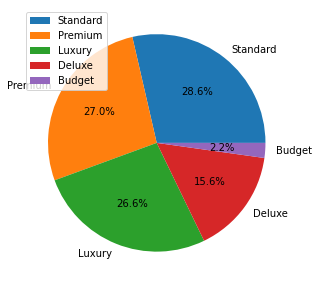

In [21]:
plt.figure(figsize=(20,5))
plt.pie(ds['Package Type'].value_counts(),labels =ds['Package Type'].unique(),autopct='%1.1f%%')
plt.legend(loc="upper left")
plt.show()

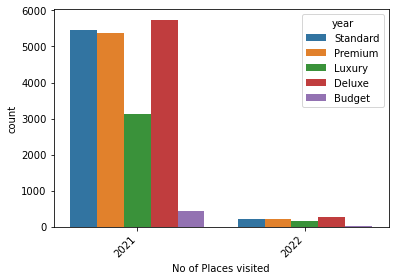

In [22]:
sns.countplot(x = 'Travel Year', hue = 'Package Type', data = ds,
 dodge = True)
plt.xlabel(xlabel='No of Places visited')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'year', bbox_to_anchor = (1, 1))


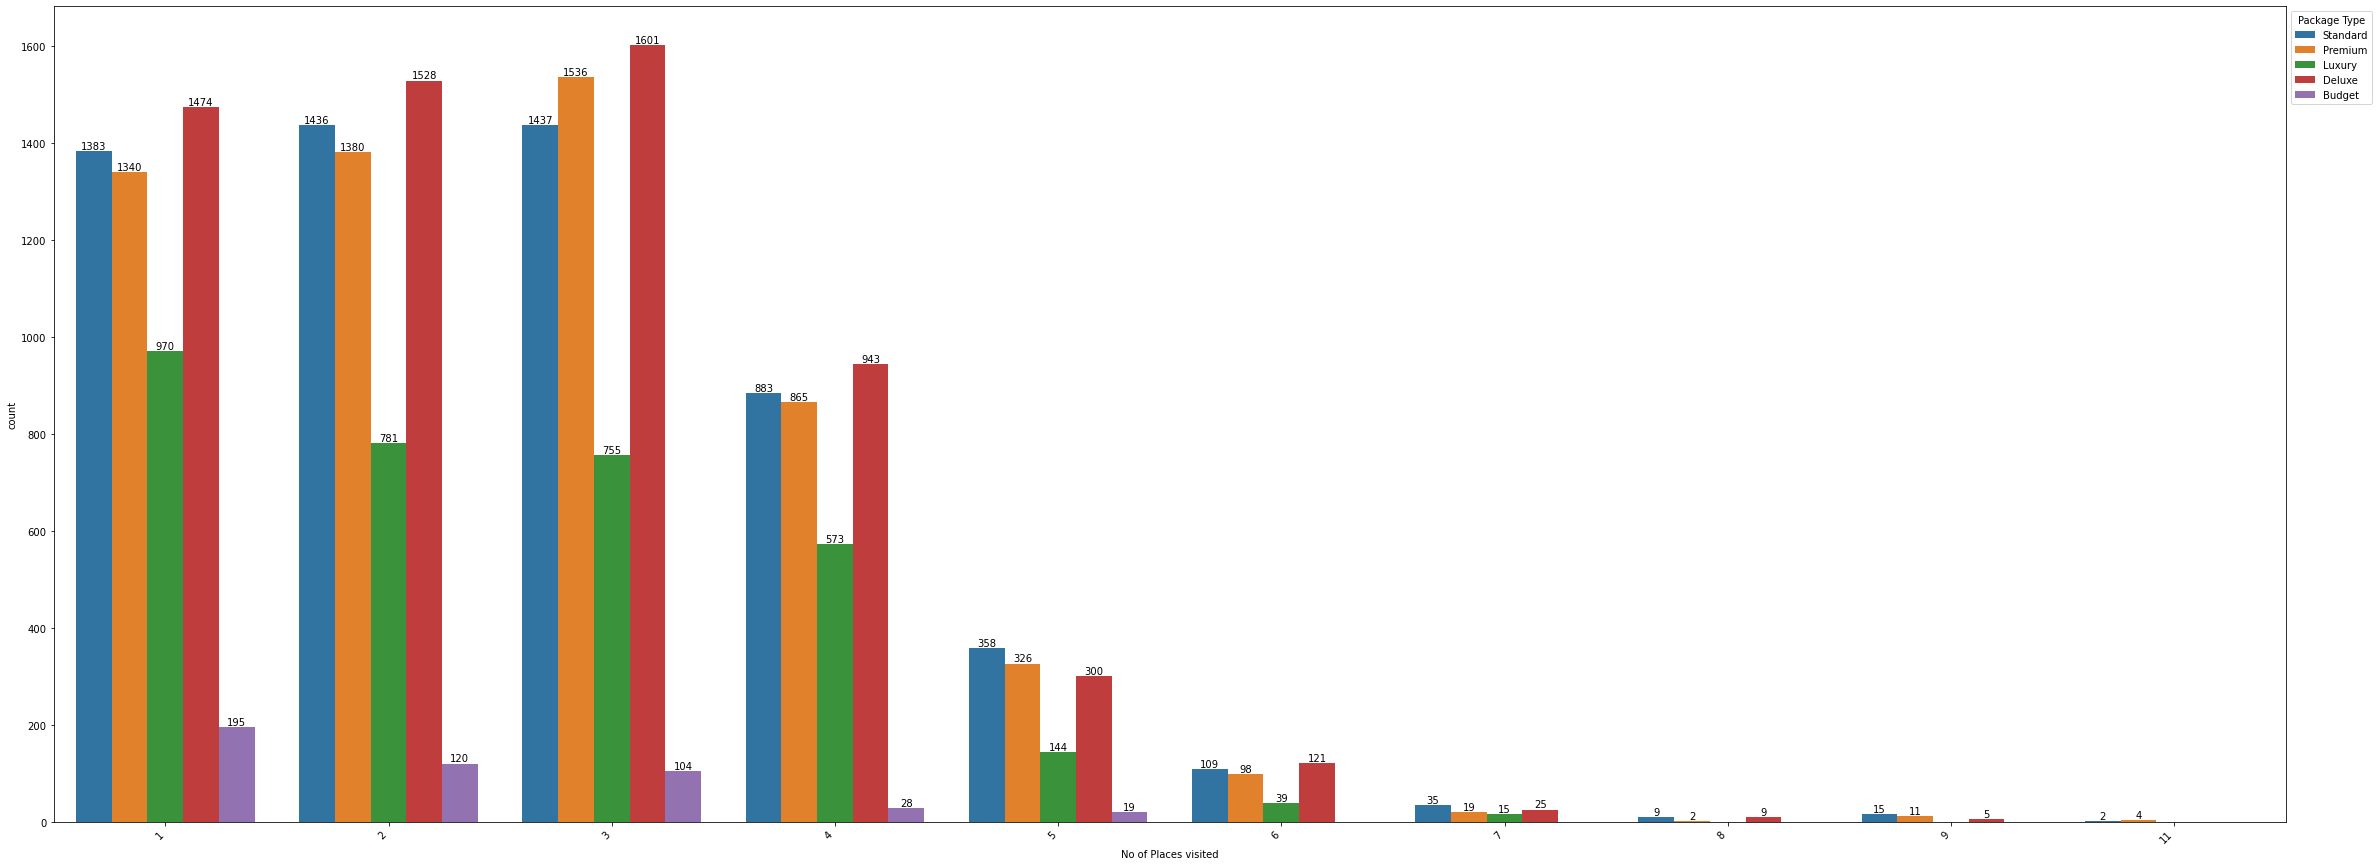

In [23]:
plt.figure(figsize=(40,15))
r = sns.countplot(x = 'No.of Places Covered', hue = 'Package Type', data = ds,dodge = True)
plt.xlabel(xlabel='No of Places visited')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Package Type', bbox_to_anchor = (1, 1))
for i in r.containers:
    r.bar_label(i)

In [24]:
k=[]
for i in ds['Hotel Details']:
    m=""
    if i=="Not Available":
        k.append(0)
    else:
        for j in i:
            if j.isnumeric() or j=="." and i.index(".")>i.index(":"):
                m=m+j
            if j=="|" or j==",":
                break
        if m=="":
            k.append(0)
        else:
            k.append(m)
ds["Hotel Rating"]=k

In [25]:
ds["Hotel Rating"]=ds["Hotel Rating"].astype(float)

In [26]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20997 entries, 0 to 20999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Package Name                20997 non-null  object        
 1   Package Type                20997 non-null  object        
 2   Itinerary                   20997 non-null  object        
 3   Places Covered              20997 non-null  object        
 4   Travel Date                 20997 non-null  datetime64[ns]
 5   Hotel Details               20997 non-null  object        
 6   Start City                  20997 non-null  object        
 7   Airline                     20997 non-null  object        
 8   Flight Stops                20997 non-null  int64         
 9   Meals                       20997 non-null  int64         
 10  Sightseeing Places Covered  20997 non-null  object        
 11  Cancellation Rules          20997 non-null  object    

In [27]:
ds.drop(['Sightseeing Places Covered','Package Name','Itinerary','Per Person Price','Travel Date','Places Covered','Airline','Hotel Details'],axis=1,inplace=True)

In [28]:
ds.drop(['Travel Year'],axis=1,inplace=True)

In [29]:
ds

,Package Type,Start City,Flight Stops,Meals,Cancellation Rules,No.of Places Covered,Travel Month,No.of seightseeing Places,No.of days spent,No of Airlines Used,New Price,Hotel Rating
0,Standard,Mumbai,2,3,Not Available,4,7,1,6,1,11509.0,0.0
1,Premium,New Delhi,0,5,Cancellation any time after making the 1st pay...,3,8,7,4,2,22485.5,4.6
2,Luxury,New Delhi,0,4,Cancellation any time after making the 1st pay...,2,4,8,3,1,12421.5,4.4
3,Premium,New Delhi,0,5,Cancellation any time after making the 1st pay...,5,8,9,6,1,35967.0,4.6
4,Premium,New Delhi,0,5,Cancellation any time after making the 1st pay...,2,12,2,7,2,25584.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,Deluxe,Mumbai,1,3,Cancellation any time after making the 1st pay...,3,4,12,6,1,16168.5,0.0
20996,Luxury,New Delhi,0,4,Cancellation any time after making the 1st pay...,4,8,9,7,2,33770.5,4.6
20997,Deluxe,New Delhi,1,3,Cancellation any time after making the 1st pay...,1,2,2,5,4,29964.0,4.0
20998,Deluxe,New Delhi,1,3,Cancellation any time after making the 1st pay...,3,1,22,6,1,28145.5,4.4


In [30]:
label_encoder = LabelEncoder()
cat = ds.select_dtypes(include='object').columns
for  i in cat:
    ds[i] = label_encoder.fit_transform(ds[i])

In [31]:
w=[]
for i in ds.columns:
    r='_'.join(i.split())
    w.append(r)
ds.columns = w

In [32]:
ds

,Package_Type,Start_City,Flight_Stops,Meals,Cancellation_Rules,No.of_Places_Covered,Travel_Month,No.of_seightseeing_Places,No.of_days_spent,No_of_Airlines_Used,New_Price,Hotel_Rating
0,4,0,2,3,5,4,7,1,6,1,11509.0,0.0
1,3,1,0,5,0,3,8,7,4,2,22485.5,4.6
2,2,1,0,4,0,2,4,8,3,1,12421.5,4.4
3,3,1,0,5,0,5,8,9,6,1,35967.0,4.6
4,3,1,0,5,0,2,12,2,7,2,25584.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,1,0,1,3,0,3,4,12,6,1,16168.5,0.0
20996,2,1,0,4,0,4,8,9,7,2,33770.5,4.6
20997,1,1,1,3,0,1,2,2,5,4,29964.0,4.0
20998,1,1,1,3,0,3,1,22,6,1,28145.5,4.4


In [33]:
ds['Hotel_Rating'].replace(0.0,ds['Hotel_Rating'].median(),inplace=True)

In [34]:
x = ds.drop('New_Price',axis=1)
y = ds['New_Price']

<AxesSubplot:>

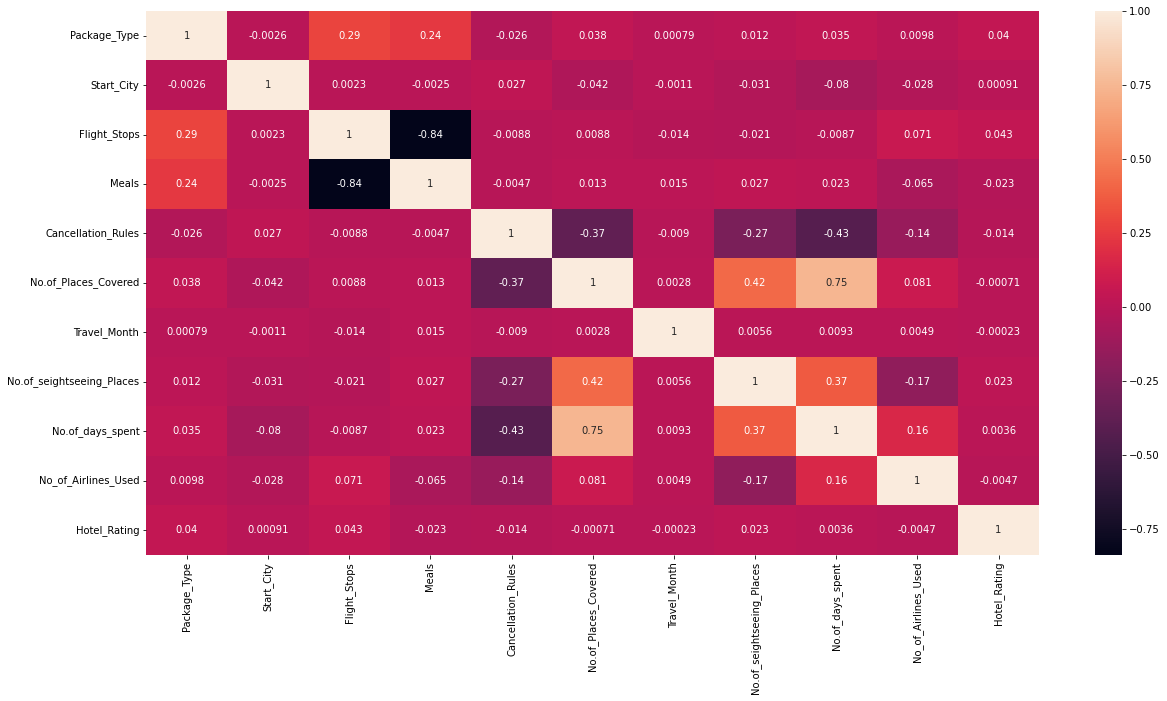

In [35]:
corr = x.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True)

In [36]:
x = ds.drop(['New_Price','Meals'],axis=1)


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=7)

In [38]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train,Y_train)

feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [52]:
lr = LinearRegression().fit(X_train, Y_train)
Y_predicted = lr.predict(X_test)
print(lr.coef_)
print(mt.r2_score(Y_test,Y_predicted))
print(mt.mean_squared_error(Y_test,Y_predicted))
print(mt.mean_absolute_error(Y_test,Y_predicted))
print(np.sqrt(mt.mean_squared_error(Y_test,Y_predicted)))

[ 5.01858492e+02 -6.43605216e+01 -4.34752016e+03 -1.76535634e+02
 -1.10696326e+03  3.62578631e+00  1.73585560e+02  3.06809477e+03
  4.54507126e+03  9.49904502e-03]
0.5170849054017752
52031790.31764695
5243.263242970509
7213.306476065394


In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
clf = RandomForestRegressor().fit(X_train, Y_train)
Y_predicted = clf.predict(X_test)
print(mt.r2_score(Y_test,Y_predicted))
print(mt.mean_squared_error(Y_test,Y_predicted))
print(np.sqrt(mt.mean_squared_error(Y_test,Y_predicted)))

0.6825829402654507
34200169.09824048
5848.091064462016


In [42]:
forest=RandomForestRegressor(n_estimators=20,
                             max_depth=10,
                             criterion='mse').fit(X_train, Y_train)
Y_predicted = forest.predict(X_test)
print(clf.get_params())
print(mt.r2_score(Y_test,Y_predicted))
print(mt.mean_squared_error(Y_test,Y_predicted))
print(np.sqrt(mt.mean_squared_error(Y_test,Y_predicted)))

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.6739758441405053
35127542.51403646
5926.849290646462


In [43]:
from sklearn.tree import DecisionTreeRegressor

# Build decision tree
tree=DecisionTreeRegressor()
tree.fit(X_train,Y_train)
Y_predicted = tree.predict(X_test)
print(mt.r2_score(Y_test,Y_predicted))
print(mt.mean_squared_error(Y_test,Y_predicted))
print(np.sqrt(mt.mean_squared_error(Y_test,Y_predicted)))

0.49054867532473323
54890942.11189398
7408.8421573073065


In [44]:
cross_val_score(clf,x,y,cv=10).mean()

0.70654376778676

In [45]:
cross_val_score(lr,x,y,cv=10).mean()

0.5175976384772152

In [46]:
cross_val_score(tree,x,y,cv=10).mean()

0.5158653300912726

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
     # Calculating VIF
     vif = pd.DataFrame()
     vif["variables"] = x.columns
     vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
     return vif

In [48]:
calc_vif(x)

,variables,VIF
0,Package_Type,4.906722
1,Start_City,2.602420
2,Flight_Stops,2.268109
3,Cancellation_Rules,1.251133
4,No.of_Places_Covered,11.395313
5,Travel_Month,4.251963
6,No.of_seightseeing_Places,4.380155
7,No.of_days_spent,16.830435
8,No_of_Airlines_Used,3.721208
9,Hotel_Rating,1.004684


In [50]:
import statsmodels.api as sm
import pandas as pd
 

# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:              New_Price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2260.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        13:32:13   Log-Likelihood:            -2.1655e+05
No. Observations:               20997   AIC:                         4.331e+05
Df Residuals:                   20986   BIC:                         4.332e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

C:\Users\HOME\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
NN = pd.DataFrame(Y_test,Y_predicted)
NN

,New_Price
19162.482335,NaN
16037.862343,NaN
12378.110863,NaN
24718.435404,NaN
24975.758931,NaN
...,...
24002.085894,NaN
24249.248052,NaN
18400.481434,NaN
15939.031690,NaN
